In [1]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

c:\Users\Somebody\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
print(tf.version.VERSION)
print(tfds.__version__)
print(keras.__version__)

In [2]:
from tensorflow.python.client import device_lib
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "99"
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15525151078772480957
xla_global_id: -1
]


In [ ]:
tfds.list_builders()
#datas = tfds.load('starcraft_video')
#tfds.show_examples(datas)

In [ ]:
builder = tfds.builder("rock_paper_scissors")
info = builder.info


In [3]:
ds_train = tfds.load("rock_paper_scissors", split="train", data_dir="./data/")
ds_test = tfds.load("rock_paper_scissors", split="test", data_dir="./data/")

In [ ]:
fig = tfds.show_examples(info, ds_train)

In [4]:
train_images = np.array([dt['image'].numpy()[:,:,0] for dt in ds_train])
train_label = np.array([dt['label'].numpy() for dt in ds_train])

In [5]:
train_images = train_images.reshape(2520, 300, 300, 1)
train_images = train_images.astype('float32')
train_images /= 255


In [16]:
test_images = np.array([dt['image'].numpy()[:,:,0] for dt in ds_test])
test_label = np.array([dt['label'].numpy() for dt in ds_test])
test_images = test_images.reshape(372, 300, 300, 1)
test_images = test_images.astype('float32')
test_images /= 255

In [ ]:
print(train_label.shape)
print(train_images.shape)
print(np.max(train_label))

In [11]:
model = Sequential([
    Conv2D(64, 3, activation='relu', padding='same', data_format="channels_last", input_shape=(300, 300, 1)),
    Conv2D(32, 3, activation='relu', padding='same', data_format="channels_last"),
    MaxPooling2D(pool_size=(8, 8)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 300, 300, 64)      640       
                                                                 
 conv2d_5 (Conv2D)           (None, 300, 300, 32)      18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 43808)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               11215104  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                      

In [13]:
h = model.fit(train_images, train_label, batch_size=32, epochs=3)

Epoch 1/3
79/79 [==============================] - 284s 4s/step - loss: 0.6207 - accuracy: 0.7750
Epoch 2/3
79/79 [==============================] - 269s 3s/step - loss: 0.0314 - accuracy: 0.9913
Epoch 3/3
79/79 [==============================] - 272s 3s/step - loss: 0.0097 - accuracy: 0.9984


In [ ]:
print(h.history.keys())

In [14]:
def plot_histroy(history):
    plt.figure()
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.plot(history.epoch, history.history['loss'], label="train loss")
    plt.plot(history.epoch, history.history['accuracy'], label="train accuracy")

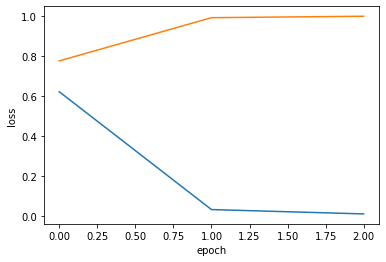

In [15]:
plot_histroy(h)

In [ ]:
model.save_weights('rock.h5')

In [17]:
model.evaluate(test_images, test_label)

12/12 [==============================] - 7s 562ms/step - loss: 1.0850 - accuracy: 0.7177


[1.0849785804748535, 0.7177419066429138]

In [ ]:
plot_model(model, show_shapes=True)